In [24]:
#Plot of confirmed Corona cases in selected countries.
#Last update: 2020-03-19, 9:00, JL

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sta
import scipy.optimize
import statsmodels.stats.api as sms

#https://github.com/CSSEGISandData/COVID-19
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn_confirmed='time_series_19-covid-Confirmed.csv'
fn_deaths='time_series_19-covid-Deaths.csv'
fn_population='https://raw.githubusercontent.com/datasets/population/master/data/population.csv'

In [2]:
# get John's Hopkins data and consolidate for countries.
def getJHUdata(fn,valName='cases'):
    df = pd.read_csv(fn,index_col=None)
    df=df.drop(['Lat','Long'],axis=1)
    df=df.set_index([*df.columns[:2]])
    df=df.stack().reset_index()
    df.columns=['state','country','date',valName]
    df.date=pd.to_datetime(df.date)
    df=df.groupby(['country','date']).sum().reset_index()
    return df

In [3]:
dfc = getJHUdata(url+fn_confirmed)
dfc.tail()

,country,date,cases
8659,Zambia,2020-03-14,0
8660,Zambia,2020-03-15,0
8661,Zambia,2020-03-16,0
8662,Zambia,2020-03-17,0
8663,Zambia,2020-03-18,2


In [4]:
dfd = getJHUdata(url+fn_deaths,'deaths')
dfd.tail()

,country,date,deaths
8659,Zambia,2020-03-14,0
8660,Zambia,2020-03-15,0
8661,Zambia,2020-03-16,0
8662,Zambia,2020-03-17,0
8663,Zambia,2020-03-18,0


In [5]:
# get population data.
# Note, many country names don't match between population and case data.
dfp = pd.read_csv(fn_population)
dfp=dfp[dfp.Year==dfp.Year.max()]
dfp.columns=[*dfp.columns[:-1],'population']
dfp.head()

,Country Name,Country Code,Year,population
56,Arab World,ARB,2016,4.064527e+08
113,Caribbean small states,CSS,2016,7.245472e+06
170,Central Europe and the Baltics,CEB,2016,1.029741e+08
227,Early-demographic dividend,EAR,2016,3.170542e+09
284,East Asia & Pacific,EAS,2016,2.296786e+09


In [6]:
df=dfc.merge(dfd,on=[*dfc.columns[:2]])
df=df.merge(dfp[[dfp.columns[0],'population']],how='left',left_on='country',right_on=dfp.columns[0])
df=df.drop('Country Name',axis=1)
df.head()

,country,date,cases,deaths,population
0,Afghanistan,2020-01-22,0,0,34656032.0
1,Afghanistan,2020-01-23,0,0,34656032.0
2,Afghanistan,2020-01-24,0,0,34656032.0
3,Afghanistan,2020-01-25,0,0,34656032.0
4,Afghanistan,2020-01-26,0,0,34656032.0


In [7]:
# Compute ratios
df['cdRatio']=df.deaths/df.cases
df['casePerPop']=df.cases/df.population

In [8]:
# Show all country names in the case data
allCountries=sorted(df.country.unique())
for a,b,c in zip(allCountries[::3],allCountries[1::3],allCountries[2::3]):
    print('{:<30}{:<30}{:<}'.format(a,b,c))

Afghanistan                   Albania                       Algeria
Andorra                       Antigua and Barbuda           Argentina
Armenia                       Australia                     Austria
Azerbaijan                    Bahrain                       Bangladesh
Barbados                      Belarus                       Belgium
Benin                         Bhutan                        Bolivia
Bosnia and Herzegovina        Brazil                        Brunei
Bulgaria                      Burkina Faso                  Cambodia
Cameroon                      Canada                        Central African Republic
Chile                         China                         Colombia
Congo (Brazzaville)           Congo (Kinshasa)              Costa Rica
Cote d'Ivoire                 Croatia                       Cruise Ship
Cuba                          Cyprus                        Czechia
Denmark                       Djibouti                      Dominican Republic
Ecuador

In [9]:
# Select countries for plots.
plotCountries=['Germany','Italy','Spain','Iran','Portugal', 'Korea, South','US']
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')

C:\Users\jlarsch\AppData\Local\Continuum\miniconda3\envs\jlsocial\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


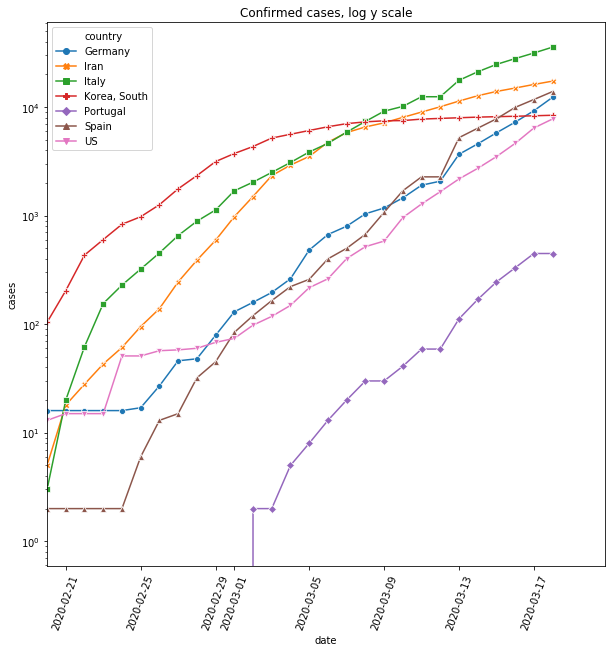

In [10]:
# Plot cases on log y scale
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)
ax = g.axes
ax.set_yscale('log')
plt.title('Confirmed cases, log y scale')
plt.xlim(left=plotStartDate)
plt.xticks(rotation=70);

Note similar slopes of european countries. Italy took of earlier

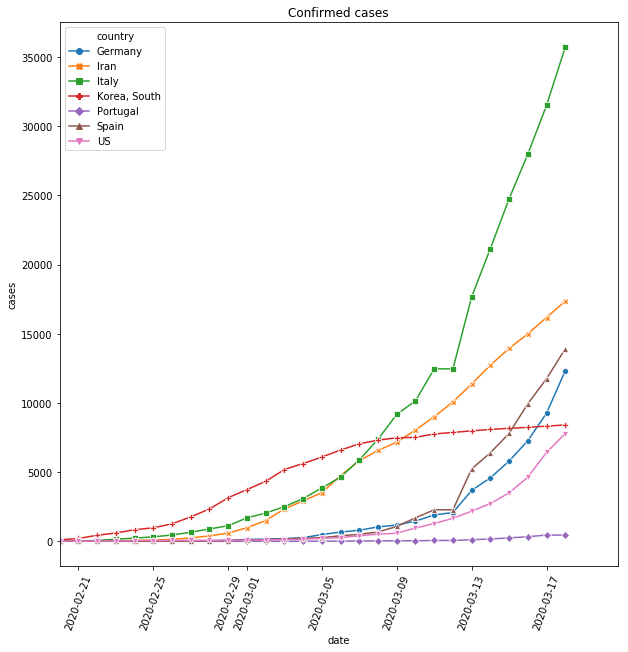

In [11]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Confirmed cases');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

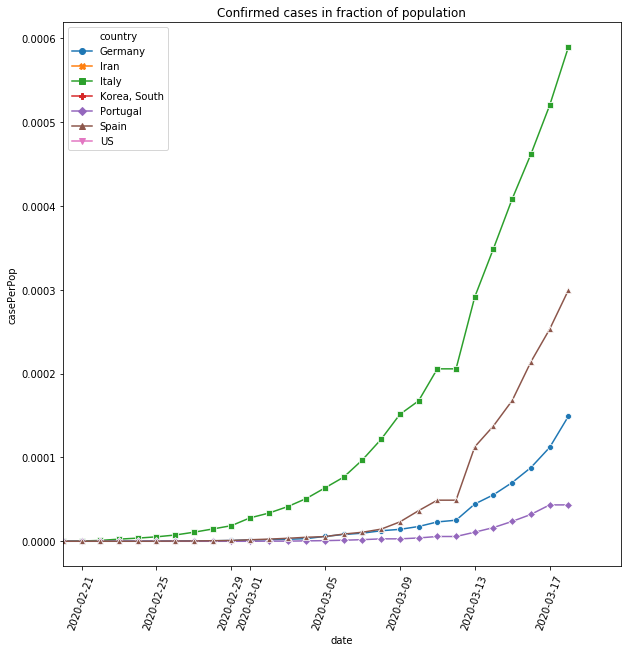

In [12]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='casePerPop',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Confirmed cases in fraction of population');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

In [25]:
# Show latest data for Germany
ix=df.country.isin(['Germany'])
df.loc[ix][-3:]

,country,date,cases,deaths,population,cdRatio,casePerPop
3075,Germany,2020-03-16,7272,17,82667685.0,0.002338,0.000088
3076,Germany,2020-03-17,9257,24,82667685.0,0.002593,0.000112
3077,Germany,2020-03-18,12327,28,82667685.0,0.002271,0.000149


In [26]:
# Show latest data for US

ix=df.country.isin(['US'])
df.loc[ix][-3:]

,country,date,cases,deaths,population,cdRatio,casePerPop
8205,US,2020-03-16,4632,85,NaN,0.018351,NaN
8206,US,2020-03-17,6421,108,NaN,0.016820,NaN
8207,US,2020-03-18,7783,118,NaN,0.015161,NaN


# Plot cases aligned to date of crossing 100 cases

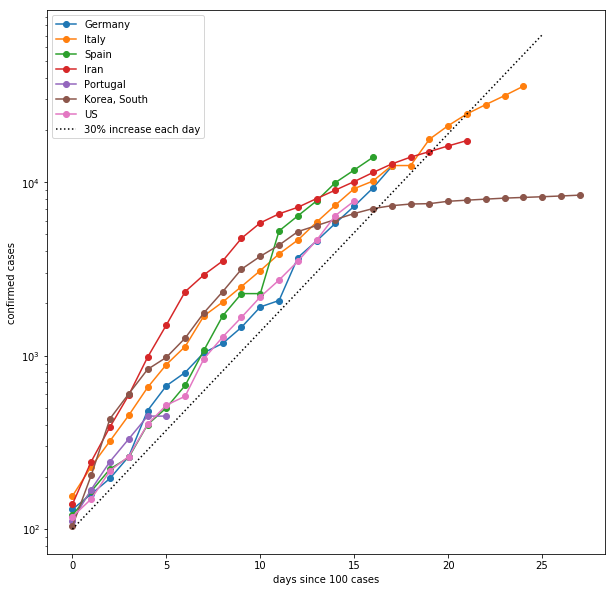

In [30]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        ax.plot(ts[inflect:],'o-',label=c)
    
t=np.linspace(0,25,100)
e=100*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')
plt.ylabel('confirmed cases');

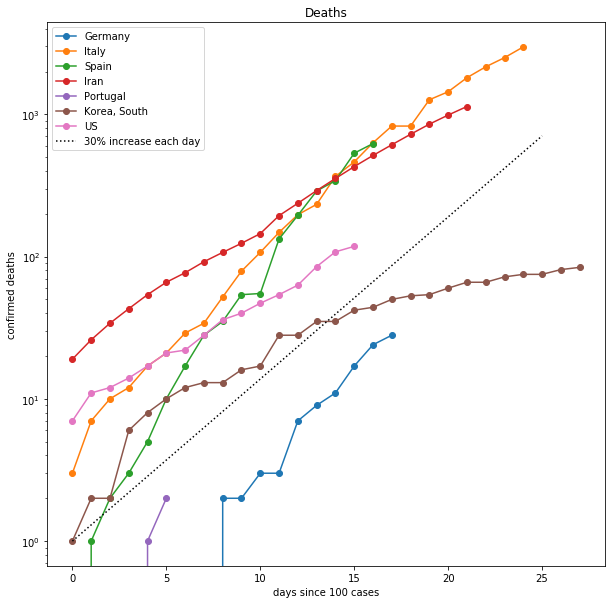

In [28]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        tsDeaths=df[ix].deaths.values
        ax.plot(tsDeaths[inflect:],'o-',label=c)
    
t=np.linspace(0,25,100)
e=1*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')
plt.ylabel('confirmed deaths')
plt.title('Deaths');

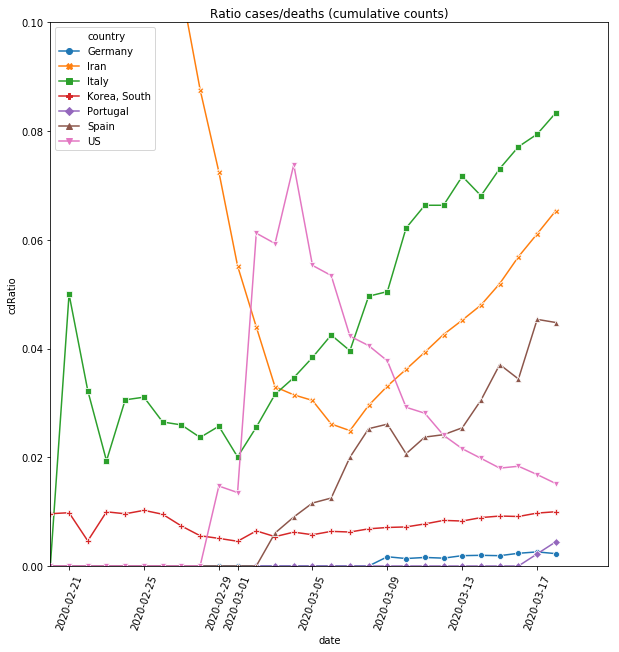

In [17]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cdRatio',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.xticks(rotation=70);
plt.ylim([0,.1])
plt.title('Ratio cases/deaths (cumulative counts)')
plt.xlim(left=plotStartDate);

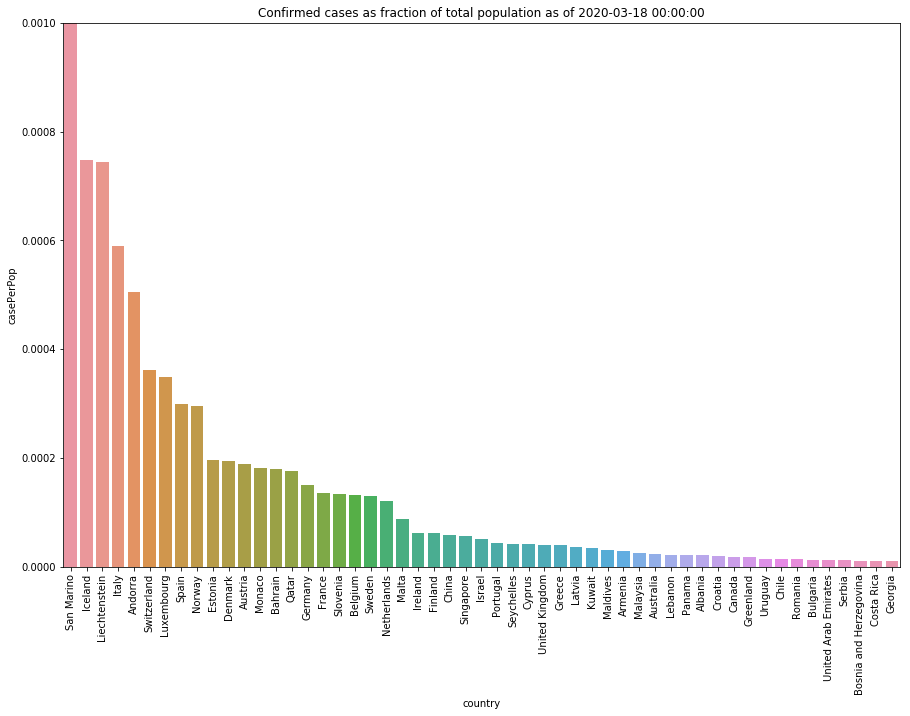

In [18]:
plt.subplots(figsize=(15,10))
ix=(df.date==df.date.max())&(df.casePerPop>0.00001)
sns.barplot(data=df[ix].sort_values(by=['casePerPop'],ascending=False),
            x='country',y='casePerPop')
plt.ylim([0,.001])
plt.title('Confirmed cases as fraction of total population as of '+str(df.date.max()))
plt.xticks(rotation=90);

#  Find % increase per day per country for recent history
## testing only countries with > 250 cases

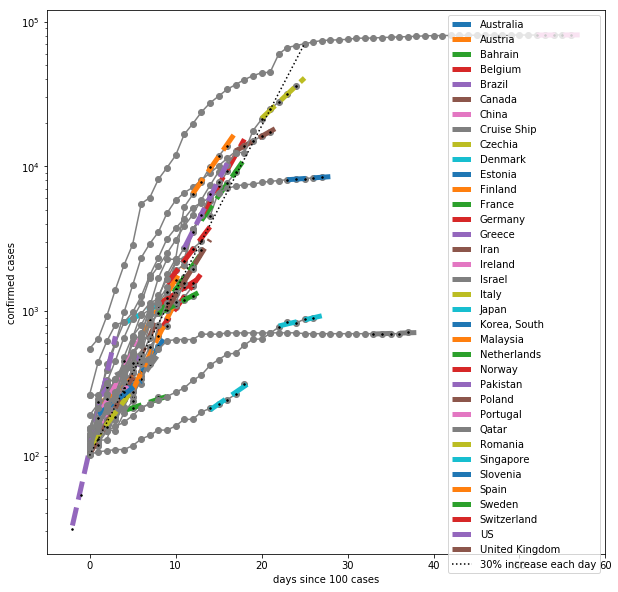

In [19]:
fitHistory=5 #days used for fit

fix,ax=plt.subplots(figsize=(10,10))

HighCountries=df[df.cases>250].country.unique()

allSlopes=np.zeros(len(HighCountries))

for i,c in enumerate(HighCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        caseLen=ts.shape[0]
        inflect=np.argmax(ts>100)
        ax.plot(ts[inflect:],'o-',color='gray')
        
        x=np.arange(fitHistory)
        y=np.log10(ts[-fitHistory:])

        s,itc,r,p,std=scipy.stats.linregress(x,y)
        t=np.linspace(caseLen-fitHistory-inflect,caseLen-inflect,100)
        tx=np.linspace(0,fitHistory,100)
        l=(10**itc)*(10**(s*tx))
        allSlopes[i]=s

        ax.plot(t,l,'--',label=c,lw=5)
        ax.plot(x+caseLen-fitHistory-inflect,10**y,'k.',markersize=3)
    
t=np.linspace(0,25,100)
e=100*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')
plt.ylabel('confirmed cases');

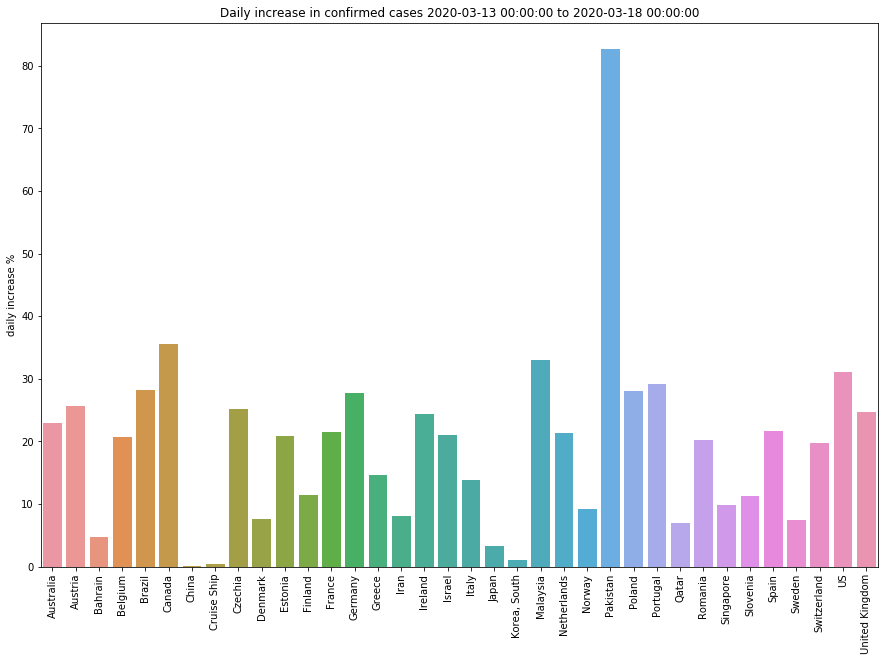

In [23]:
plt.subplots(figsize=(15,10))
sns.barplot(x=HighCountries,y=100*(10**allSlopes-1))
#plt.ylim([0,.001])
plt.title('Daily increase in confirmed cases '+str(df.date.max()-pd.DateOffset(fitHistory))+' to '+str(df.date.max()))
plt.ylabel('daily increase %')
plt.xticks(rotation=90);